<a href="https://colab.research.google.com/github/HackPhantom/Machine-Learning/blob/main/Face_Mask_Detection_CNN_(Classification)_by_Jayant_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/drive/MyDrive/Colab Notebooks/Toppers Acadmy Data/data/Machine Learning/Computer vision/archive.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [ ]:
with_mask_files[:5]

['with_mask_2260.jpg',
 'with_mask_1034.jpg',
 'with_mask_540.jpg',
 'with_mask_3319.jpg',
 'with_mask_2896.jpg']

In [ ]:
without_mask_files[:5]

['without_mask_1661.jpg',
 'without_mask_723.jpg',
 'without_mask_3715.jpg',
 'without_mask_2376.jpg',
 'without_mask_1163.jpg']

In [ ]:
print(len(with_mask_files))

3725


In [ ]:
print(len(without_mask_files))

3828


In [ ]:
print(len(with_mask_files)+ len(without_mask_files))


7553


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
with_mast_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mast_labels[:5])

[1, 1, 1, 1, 1]


In [ ]:
print(without_mask_labels[:5])

[0, 0, 0, 0, 0]


In [ ]:
labels = with_mast_labels + without_mask_labels
print(labels[:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

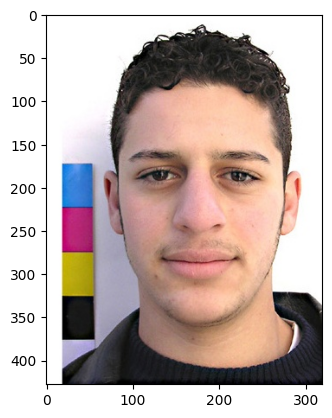

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_1029.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[ 66,  68,  47],
        [ 66,  68,  47],
        [ 66,  68,  47],
        ...,
        [185, 164,  99],
        [184, 163,  98],
        [182, 161,  96]],

       [[ 66,  68,  47],
        [ 66,  68,  47],
        [ 66,  68,  47],
        ...,
        [185, 164,  99],
        [185, 164,  99],
        [187, 166, 101]],

       [[ 66,  68,  47],
        [ 66,  68,  47],
        [ 66,  68,  47],
        ...,
        [187, 166, 101],
        [186, 165, 100],
        [187, 166, 101]],

       ...,

       [[ 91,  94, 103],
        [ 89,  90,  98],
        [ 95,  92,  98],
        ...,
        [108,  98,  99],
        [ 96,  79,  76],
        [119,  93,  83]],

       [[ 92,  91,  97],
        [ 92,  91,  98],
        [ 98,  95, 104],
        ...,
        [101,  92,  92],
        [ 99,  86,  83],
        [112,  93,  87]],

       [[ 89,  87,  87],
        [ 95,  92,  98],
        [102,  98, 109],
        ...,
        [102,  93,  92],
        [ 93,  83,  81],
        [ 87,  76,  75]]], dtype=uint8)
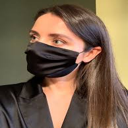

In [ ]:
data[19]

In [ ]:
x = np.array(data)
y = np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

array([[[185, 196, 202],
        [185, 196, 202],
        [185, 196, 202],
        ...,
        [115, 115, 117],
        [116, 116, 117],
        [117, 117, 117]],

       [[186, 197, 203],
        [186, 197, 203],
        [186, 197, 203],
        ...,
        [116, 116, 118],
        [115, 115, 116],
        [114, 114, 114]],

       [[186, 197, 203],
        [186, 197, 203],
        [186, 197, 203],
        ...,
        [116, 116, 118],
        [117, 117, 118],
        [119, 119, 119]],

       ...,

       [[200, 216, 222],
        [199, 217, 226],
        [203, 219, 224],
        ...,
        [ 99, 100, 104],
        [103, 104, 109],
        [104, 105, 110]],

       [[199, 216, 222],
        [198, 216, 225],
        [204, 218, 224],
        ...,
        [ 94,  95,  99],
        [104, 104, 109],
        [103, 104, 109]],

       [[200, 214, 221],
        [199, 215, 225],
        [204, 217, 223],
        ...,
        [ 82,  84,  89],
        [ 96,  98, 103],
        [103, 104, 109]]], dtype=uint8)
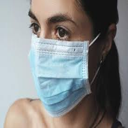

In [ ]:
x[0]

In [ ]:
y[:5]

array([1, 1, 1, 1, 1])

**Train Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [ ]:
x_train_scal = x_train/255
x_test_scal = x_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 14,  21,  39],
        [ 15,  22,  40],
        [ 19,  26,  44],
        ...,
        [ 31,  37,  55],
        [ 35,  41,  59],
        [ 15,  21,  39]],

       [[ 21,  28,  46],
        [ 21,  28,  46],
        [ 21,  28,  46],
        ...,
        [ 29,  36,  54],
        [ 78,  85, 103],
        [ 19,  25,  43]],

       [[ 20,  27,  45],
        [ 15,  22,  40],
        [ 14,  21,  39],
        ...,
        [ 17,  24,  42],
        [ 12,  19,  37],
        [ 17,  24,  42]]], dtype=uint8)
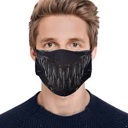

In [ ]:
x_train[0]

In [ ]:
x_train_scal[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.05490196, 0.08235294, 0.15294118],
        [0.05882353, 0.08627451, 0.15686275],
        [0.0745098 , 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
x_train_scal[0].shape

(128, 128, 3)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

# kernel_size=(3, 3): Size of the convolution kernel.
# input_shape=(height, width, channels)
# MaxPooling2D - this layer is added after a convolutional layer to reduce the spatial dimensions of the feature maps
# -and control overfitting by reducing the number of parameters.
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
# It's a common practice to use dropout after fully connected (dense) layers
# or sometimes after convolutional layers to improve generalization.
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(x_train_scal, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9450 - loss: 0.1515 - val_acc: 0.9223 - val_loss: 0.2309
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9636 - loss: 0.1009 - val_acc: 0.9207 - val_loss: 0.2602
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9663 - loss: 0.0840 - val_acc: 0.9107 - val_loss: 0.2344
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9658 - loss: 0.0864 - val_acc: 0.9256 - val_loss: 0.2488
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9713 - loss: 0.0813 - val_acc: 0.9207 - val_loss: 0.2487
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9683 - loss: 0.0749 - val_acc: 0.9240 - val_loss: 0.3590
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9687 - loss: 0.0869 - val_acc: 0.9240 - val_loss: 0.2759
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9833 - loss: 0.0479 - val_acc: 0.9240 - val_loss: 0.4028
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/

In [ ]:
loss, accuracy = model.evaluate(x_test_scal, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9329 - loss: 0.2850
Test Accuracy = 0.9404367804527283


Path of the image to be predicted: /content/data/with_mask/with_mask_100.jpg


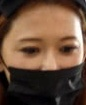

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
[[0.39893082 0.6232742 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')